# Library

In [23]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

In [24]:
df = pd.read_csv("data.csv")

In [25]:
df.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                37994 non-null  int64  
 1   month               37994 non-null  int64  
 2   duoarea             37994 non-null  object 
 3   area-name           37994 non-null  object 
 4   product             37994 non-null  object 
 5   product-name        37994 non-null  object 
 6   process             37994 non-null  object 
 7   process-name        37994 non-null  object 
 8   series              37994 non-null  object 
 9   series-description  37994 non-null  object 
 10  value               37518 non-null  float64
 11  units               37994 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.5+ MB


In [27]:
# Menambahkan kolom baru 'year_month' dari gabungan 'year' dan 'month'
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

In [28]:
df[['year_month']].head()

,year_month
0,2014-01
1,2014-01
2,2014-01
3,2014-01
4,2014-01


In [29]:
len(df.drop_duplicates()) / len(df)

1.0

In [30]:
df[['value']].value_counts()

value    
0.0          1085
1.0           439
8.0           230
2.0           223
6.0           216
             ... 
7264.0          1
7262.0          1
7258.0          1
2903574.0       1
2880714.0       1
Name: count, Length: 18923, dtype: int64

In [31]:
# Menghitung persentase nilai 0.0 di kolom value
100 * len(df[(df['value'] == 0.0) | (df['value'].isna())]) / len(df)

4.108543454229615

In [32]:
df.isna().sum()

year                    0
month                   0
duoarea                 0
area-name               0
product                 0
product-name            0
process                 0
process-name            0
series                  0
series-description      0
value                 476
units                   0
year_month              0
dtype: int64

In [33]:
df[df.isna().any(axis=1)]

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,year_month
18,2014,1,SDC,USA-DC,EPG0,Natural Gas,VEU,Electric Power Consumption,N3045DC2,District of Columbia Natural Gas Deliveries to...,NaN,MMCF,2014-01
135,2014,1,SHI,USA-HI,EPG0,Natural Gas,VEU,Electric Power Consumption,N3045HI2,Hawaii Natural Gas Deliveries to Electric Powe...,NaN,MMCF,2014-01
518,2014,2,SHI,USA-HI,EPG0,Natural Gas,VEU,Electric Power Consumption,N3045HI2,Hawaii Natural Gas Deliveries to Electric Powe...,NaN,MMCF,2014-02
597,2014,2,SDC,USA-DC,EPG0,Natural Gas,VEU,Electric Power Consumption,N3045DC2,District of Columbia Natural Gas Deliveries to...,NaN,MMCF,2014-02
778,2014,3,SHI,USA-HI,EPG0,Natural Gas,VEU,Electric Power Consumption,N3045HI2,Hawaii Natural Gas Deliveries to Electric Powe...,NaN,MMCF,2014-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37945,2024,1,SWV,USA-WV,EPG0,Natural Gas,VRS,Residential Consumption,N3010WV2,West Virginia Natural Gas Residential Consumpt...,NaN,MMCF,2024-01
37964,2024,1,SHI,USA-HI,EPG0,Natural Gas,VEU,Electric Power Consumption,N3045HI2,Hawaii Natural Gas Deliveries to Electric Powe...,NaN,MMCF,2024-01
37967,2024,1,SNV,USA-NV,EPG0,Natural Gas,VGT,Delivered to Consumers,N3060NV2,Natural Gas Delivered to Consumers in Nevada (...,NaN,MMCF,2024-01
37982,2024,1,SFL,FLORIDA,EPG0,Natural Gas,VIN,Industrial Consumption,N3035FL2,Florida Natural Gas Industrial Consumption (MMcf),NaN,MMCF,2024-01


In [34]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= year =================


year
2014    3768
2015    3768
2016    3768
2017    3768
2018    3768
2019    3768
2020    3768
2021    3768
2022    3768
2023    3768
2024     314
Name: count, dtype: int64


============= month =================


month
1     3454
2     3140
3     3140
4     3140
5     3140
6     3140
7     3140
8     3140
9     3140
10    3140
11    3140
12    3140
Name: count, dtype: int64


============= duoarea =================


duoarea
NUS    968
SFL    726
SOR    726
SNH    726
SAZ    726
SWV    726
SHI    726
SNM    726
SMI    726
SMT    726
SVT    726
SME    726
SIN    726
SMS    726
SNE    726
SDC    726
SAR    726
SNC    726
SOK    726
SDE    726
SCT    726
SWI    726
SNJ    726
SRI    726
SMO    726
SWA    726
SLA    726
SMD    726
SKY    726
STN    726
SMN    726
SUT    726
SIL    726
SAL    726
SPA    726
SID    726
SMA    726
SOH    726
SAK    726
SSC    726
SWY    726
STX    726
SND    726
SVA    726
SIA    726
SCA    726
SNV    726
SGA    726
SNY    726
SSD    726
SKS    726
SCO    726
Name: count, dtype: int64


============= area-name =================


area-name
U.S.             968
FLORIDA          726
USA-OR           726
USA-NH           726
USA-AZ           726
USA-WV           726
USA-HI           726
USA-NM           726
USA-MI           726
USA-MT           726
USA-VT           726
USA-ME           726
USA-IN           726
USA-MS           726
USA-NE           726
USA-DC           726
USA-AR           726
USA-NC           726
USA-OK           726
USA-DE           726
USA-CT           726
USA-WI           726
USA-NJ           726
USA-RI           726
USA-MO           726
WASHINGTON       726
USA-LA           726
USA-MD           726
USA-KY           726
USA-TN           726
MINNESOTA        726
USA-UT           726
USA-IL           726
USA-AL           726
USA-PA           726
USA-ID           726
MASSACHUSETTS    726
OHIO             726
USA-AK           726
USA-SC           726
USA-WY           726
TEXAS            726
USA-ND           726
USA-VA           726
USA-IA           726
CALIFORNIA       726
USA-NV           726
USA


============= product =================


product
EPG0    37994
Name: count, dtype: int64


============= product-name =================


product-name
Natural Gas    37994
Name: count, dtype: int64


============= process =================


process
VCS    6292
VDV    6292
VEU    6292
VGT    6292
VIN    6292
VRS    6292
VGP     121
VGL     121
Name: count, dtype: int64


============= process-name =================


process-name
Commercial Consumption              6292
Vehicle Fuel Consumption            6292
Electric Power Consumption          6292
Delivered to Consumers              6292
Industrial Consumption              6292
Residential Consumption             6292
Pipeline Fuel Consumption            121
Lease and Plant Fuel Consumption     121
Name: count, dtype: int64


============= series =================


series
N3010WV2        121
N3020FL2        121
N3020NH2        121
N3020OR2        121
N3020DE2        121
               ... 
NA1570_SIN_2    121
NA1570_SME_2    121
NA1570_SFL_2    121
NA1570_SVT_2    121
NA1570_SDE_2    121
Name: count, Length: 314, dtype: int64


============= series-description =================


series-description
West Virginia Natural Gas Residential Consumption (MMcf)                                                        121
Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in Florida (MMcf)          121
Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in New Hampshire (MMcf)    121
Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in Oregon (MMcf)           121
Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in Delaware (MMcf)         121
                                                                                                               ... 
Indiana Natural Gas Vehicle Fuel Consumption (MMcf)                                                             121
Maine Natural Gas Vehicle Fuel Consumption (MMcf)                                                               121
Florida Natural Gas Vehicle Fuel Consumption (MMcf)  


============= value =================


value
0.0        1085
1.0         439
8.0         230
2.0         223
6.0         216
           ... 
6304.0        1
13221.0       1
7367.0        1
12875.0       1
8558.0        1
Name: count, Length: 18923, dtype: int64


============= units =================


units
MMCF    37994
Name: count, dtype: int64


============= year_month =================


year_month
2014-01    314
2014-02    314
2014-03    314
2014-04    314
2014-05    314
          ... 
2023-09    314
2023-10    314
2023-11    314
2023-12    314
2024-01    314
Name: count, Length: 121, dtype: int64

In [35]:
# Menghitung median value dari data yang tidak bernilai 0.0 pada dataset
median_value = df[(df['value'] != 0.0) & (~df['value'].isna())]['value'].median()
median_value

np.float64(4723.0)

## Data Cleaning

In [36]:
df_copy = df.copy()

In [37]:
# Mengisi nilai missing (baik -1 maupun NaN) pada kolom Rating dengan pengetahuan median dari data train
df_copy['value'] = df['value'].apply(lambda x: median_value if x == 0.0 or pd.isna(x) else x)

In [38]:
df_copy.isna().sum()

year                  0
month                 0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
year_month            0
dtype: int64

In [39]:
df_copy.describe()

,year,month,value
count,37994.000000,37994.000000,3.799400e+04
mean,2018.545455,6.454545,2.953011e+04
std,2.903442,3.473677,1.494765e+05
min,2014.000000,1.000000,1.000000e+00
25%,2016.000000,3.000000,1.148250e+03
50%,2019.000000,6.000000,4.723000e+03
75%,2021.000000,9.000000,1.589525e+04
max,2024.000000,12.000000,3.391775e+06


In [52]:
df_missing_cleaned = df_copy.copy()
print(f"before : {df_copy.shape}")
df_copy.dropna(how='any', inplace=True)
print(f"next : {df_copy.shape}")
print(f"droped : {df_missing_cleaned.shape[0] - df_copy.shape[0]}")

before : (37994, 7)
next : (37994, 7)
droped : 0


In [40]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

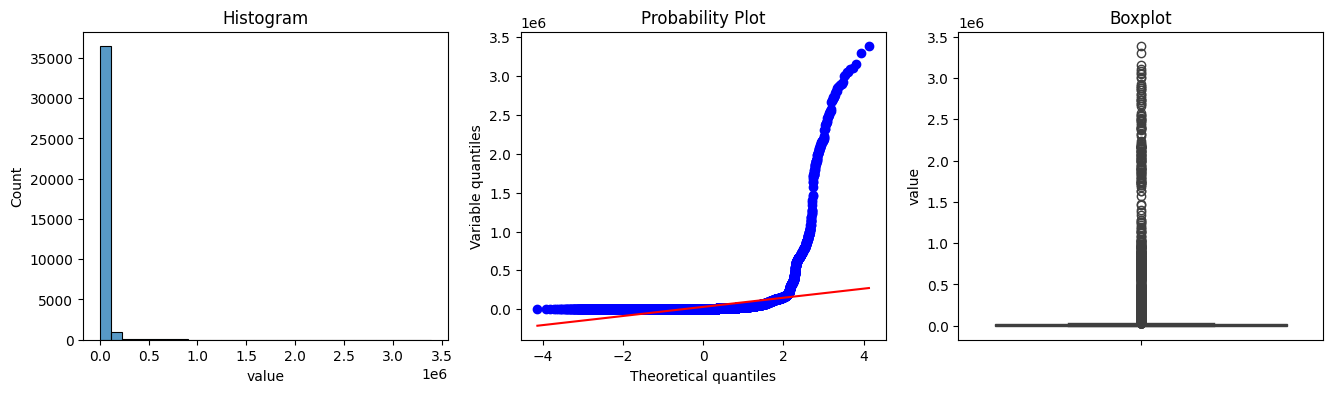

In [53]:
check_plot(df_missing_cleaned, 'value')

In [42]:
for column in ['units', 'product', 'product-name'] :
    print(f"{df_copy[column].nunique()} unique values for {column}")

df_copy.drop(['units', 'product', 'product-name'], axis=1, inplace=True)
df_copy.head(1)

1 unique values for units
1 unique values for product
1 unique values for product-name


,year,month,duoarea,area-name,process,process-name,series,series-description,value,year_month
0,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,2014-01


1. 1 unique values for units
2. 1 unique values for product
3. 1 unique values for product-name

Jadi kita bisa remove kolom unit, product, dan product-name

In [43]:
for column in ['duoarea', 'area-name'] :
    print(f"{df_copy[column].nunique()} unique values for {column}")
print(f"{( df_copy['duoarea'] + df_copy['area-name'] ).nunique()} unique value if we concat duoarea and area-name")

52 unique values for duoarea
52 unique values for area-name
52 unique value if we concat duoarea and area-name


1. 52 unique values for duoarea
2. 52 unique values for area-name
3. 52 unique value if we concat duoarea and area-name

Kedua kolom memiliki nilai unik yang sama, jadi kita bisa remove 'duorea'

In [44]:
df_copy.drop('duoarea', axis=1, inplace=True)
df_copy.head(1)

,year,month,area-name,process,process-name,series,series-description,value,year_month
0,2014,1,FLORIDA,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,2014-01


In [45]:
for column in ['process', 'process-name'] :
    print(f"{df_copy[column].nunique()} unique values for {column}")
print(f"{( df_copy['process'] + df_copy['process-name'] ).nunique()} unique value if we concat'process' and 'process-name'")

8 unique values for process
8 unique values for process-name
8 unique value if we concat'process' and 'process-name'


1. 8 unique values for process
2. 8 unique values for process-name
3. 8 unique value if we concat'process' and 'process-name'

Kedua kolom memiliki nilai unik yang sama, jadi kita bisa remove 'process'

In [46]:
df_copy.drop('process', axis=1, inplace=True)
df_copy.head(1)

,year,month,area-name,process-name,series,series-description,value,year_month
0,2014,1,FLORIDA,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,2014-01


In [47]:
for column in ['series', 'series-description'] :
    print(f"{df_copy[column].nunique()} unique values for {column}")
print(f"{( df_copy['series'] + df_copy['series-description'] ).nunique()} unique value if we concat'series' and 'series-description'")

314 unique values for series
314 unique values for series-description
314 unique value if we concat'series' and 'series-description'


1. 313 unique values for series
2. 313 unique values for series-description
3. 313 unique value if we concat'series' and 'series-description'

Remove "series", dan simpan "series-description"

In [48]:
df_copy.drop('series', axis=1, inplace=True)
df_copy.head(1)

,year,month,area-name,process-name,series-description,value,year_month
0,2014,1,FLORIDA,Commercial Consumption,Natural Gas Deliveries to Commercial Consumers...,6605.0,2014-01


Jadi kolom 'units', 'product', 'product-name', 'duoarea', 'process' dan 'series' telah di remove

In [49]:
# Let's change the name of the columns.
df_copy = df_copy.rename(mapper={'area-name': 'area',
                       'process-name': 'process',
                       'series-description': 'series'}, axis=1)
df_copy.head(1)

,year,month,area,process,series,value,year_month
0,2014,1,FLORIDA,Commercial Consumption,Natural Gas Deliveries to Commercial Consumers...,6605.0,2014-01


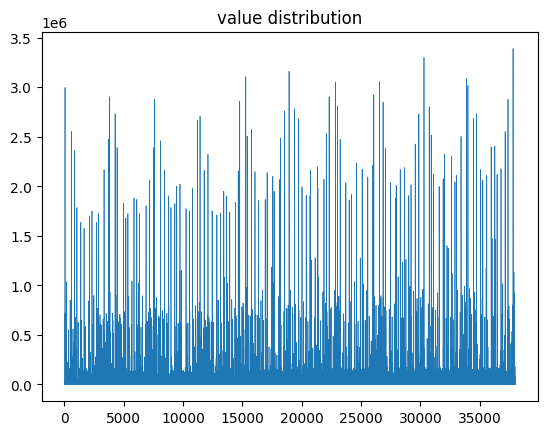

In [54]:
fig, ax = plt.subplots()
ax.set_title('value distribution')
ax.plot(df_copy.index, df_copy['value'], linewidth=0.5)
plt.show()